# Import Necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, precision_score,recall_score,f1_score

# Loading of Dataset Into Pandas Dataframe

In [2]:
df=pd.read_csv('default of credit card clients.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# lets check for null values
df.isnull().sum().sort_values

<bound method Series.sort_values of ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64>

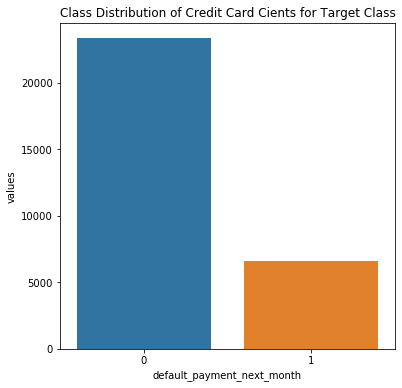

In [6]:
# as we can see from above table, there is no missing data in our dataset so we can move forward and check if data is well
# balanced or not
distr = df["default_payment_next_month"].value_counts()
plot_df = pd.DataFrame({'default_payment_next_month': distr.index,'values': distr.values})
plt.figure(figsize = (6,6))
plt.title('Class Distribution of Credit Card Cients for Target Class')
sns.set_color_codes("pastel")
sns.barplot(x = 'default_payment_next_month', y="values", data=plot_df)
locs, labels = plt.xticks()
plt.show()

# Exploratory Data Analysis

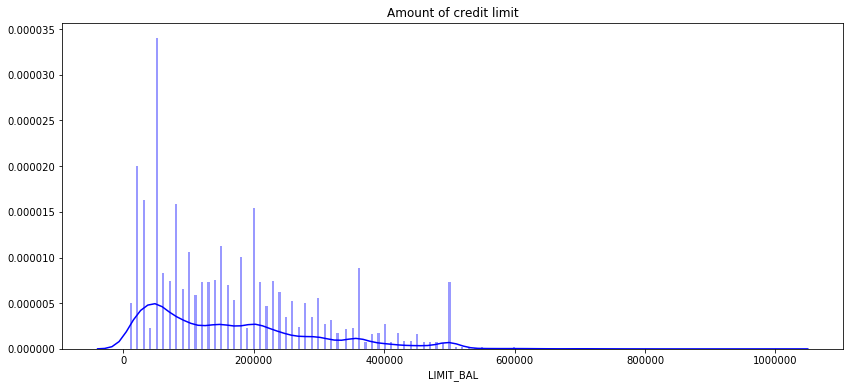

In [7]:
# Plot amount of credit Limit against no. of customers
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=300, color="blue")
plt.show()

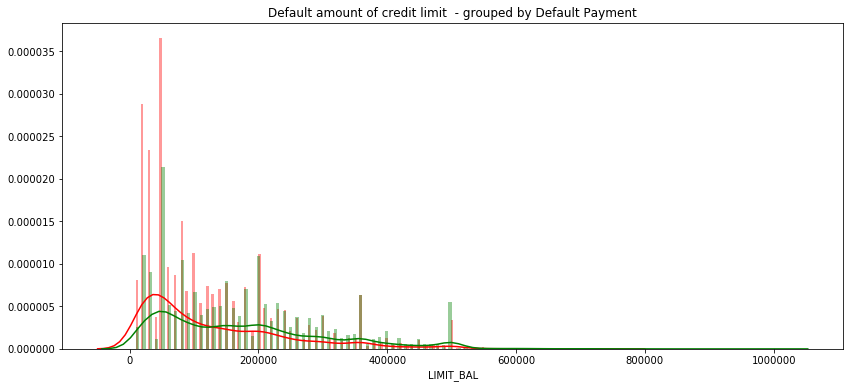

In [8]:
# Plot amount of credit Limit against no. of default customers
class_0 = df.loc[df['default_payment_next_month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default_payment_next_month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Default Payment')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

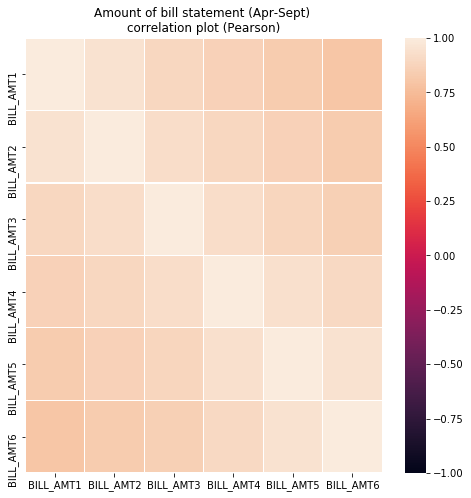

In [38]:
# heat map for bill statements
bills = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[bills].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()


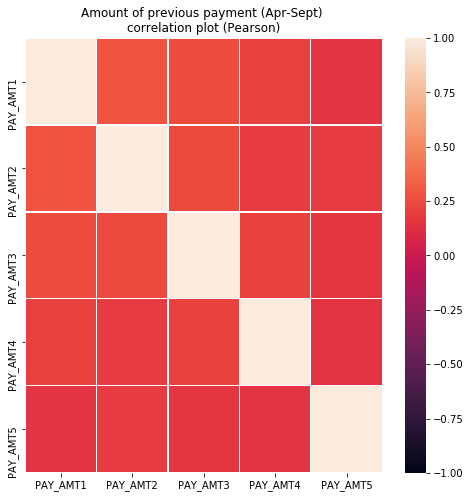

In [10]:
payments = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[payments].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

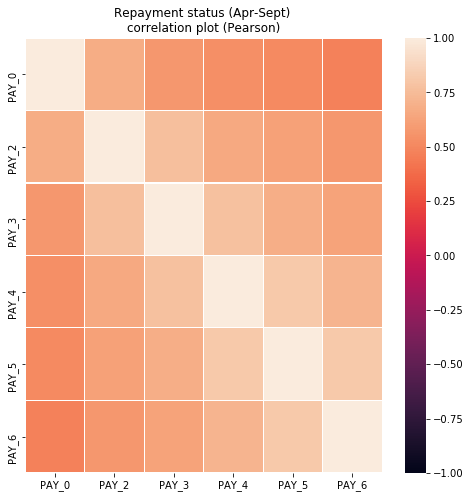

In [11]:
repayments = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[repayments].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

# Model Training and Testing

In [12]:
train_set, test_set = train_test_split(df, test_size=0.20, random_state=42, shuffle=True )

In [13]:
train_set

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
21753,21754,80000,2,2,2,24,0,0,0,0,...,73731,39643,39457,3503,5001,2092,1218,1445,878,0
251,252,30000,1,2,2,28,0,0,0,0,...,25255,22001,0,5006,1244,851,955,0,0,0
22941,22942,180000,2,5,1,44,0,0,-1,-1,...,0,6881,10340,0,850,0,6881,10340,182,0
618,619,60000,1,1,2,25,0,0,0,0,...,39639,39619,39140,2018,1900,2000,1500,1900,2000,0
17090,17091,130000,2,2,2,25,0,0,0,0,...,117823,120854,123904,4100,4200,5000,5000,5000,10700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,29803,50000,1,2,2,32,0,0,0,0,...,55957,29238,6119,2000,3000,1591,72,1134,73421,0
5390,5391,200000,1,1,2,37,2,2,2,2,...,164182,169029,172084,13500,6000,0,7500,6000,4000,1
860,861,50000,1,1,2,26,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
15795,15796,70000,2,2,2,25,0,0,0,0,...,35122,28633,28039,3000,2000,4500,1200,0,1200,1


In [14]:
target_class = "default_payment_next_month"
col_to_drop_for_feature = ['ID', 'default_payment_next_month']

# Random Forest 

In [15]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)


In [16]:
train_features = train_set.drop(columns=col_to_drop_for_feature)
train_targets = train_set[target_class].values

In [17]:
clf.fit(train_features, train_targets)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [18]:
test_features = test_set.drop(columns = col_to_drop_for_feature)
test_targets = test_set[target_class].values

In [19]:
predictions = clf.predict(test_features)

In [20]:
def get_performance(test_targets, predictions):
    print('Accuracy', accuracy_score(test_targets,predictions))
    print("ROC Accuracy", roc_auc_score(test_targets, predictions))
    print('Precision', precision_score(test_targets,predictions,average='weighted'))
    print('Recall', recall_score(test_targets,predictions,average='weighted'))
    print('F1 Score', f1_score(test_targets,predictions,average='weighted'))
get_performance(test_targets, predictions)

Accuracy 0.8173333333333334
ROC Accuracy 0.6555535713096018
Precision 0.7988082780256661
Recall 0.8173333333333334
F1 Score 0.7975350987307858


# Under Sampling

In [21]:
# as we see roc accuracy score is 0.65 but actual accuracy score is 0.81, it is due to imbalance data that we checked before,
#lets balance our dataset using 

# from above analysis, we can see our dataset is imbalanced because we have more negative instances then other two classes
# in order to balance dataset we will do undersampling (the technique to randomly reduce instances belongs to majority class)
X = df.drop(columns=col_to_drop_for_feature)
y = df[target_class]

# Create an instance of the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Convert the undersampled data back to a DataFrame if needed
undersampled_data = pd.DataFrame(X_undersampled, columns=X.columns)
undersampled_data['default_payment_next_month'] = y_undersampled

# Check the class distribution after undersampling
undersampled_class_counts = undersampled_data['default_payment_next_month'].value_counts()
print(undersampled_class_counts)

1    6636
0    6636
Name: default_payment_next_month, dtype: int64


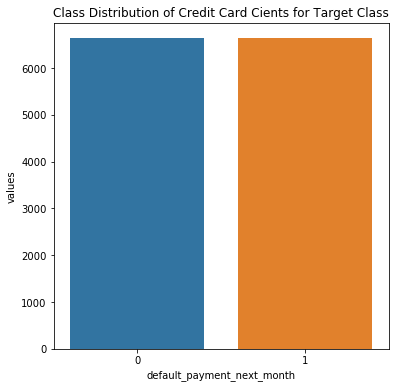

In [22]:
# as we can see from the above distribution our dataset is well balanced, lets plot this distribution
distr = undersampled_data["default_payment_next_month"].value_counts()
plot_df = pd.DataFrame({'default_payment_next_month': distr.index,'values': distr.values})
plt.figure(figsize = (6,6))
plt.title('Class Distribution of Credit Card Cients for Target Class')
sns.set_color_codes("pastel")
sns.barplot(x = 'default_payment_next_month', y="values", data=plot_df)
locs, labels = plt.xticks()
plt.show()

In [23]:
# lets split data and train models on balanced dataset 
train_set, test_set = train_test_split(undersampled_data, test_size=0.20, random_state=42, shuffle=True )

In [24]:
train_features = train_set.drop(columns=["default_payment_next_month"])
train_targets = train_set[target_class].values

In [25]:
clf.fit(train_features, train_targets)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [26]:
test_features = test_set.drop(columns = ["default_payment_next_month"])
test_targets = test_set[target_class].values
predictions = clf.predict(test_features)

In [27]:
get_performance(test_targets, predictions)

Accuracy 0.6862523540489642
ROC Accuracy 0.6865093596573458
Precision 0.6939025236204408
Recall 0.6862523540489642
F1 Score 0.6832743943325864


In [28]:
# as we can see from the above stats, accuracy decreases but ROC accuacy increases

# AdaBoostClassifier

In [29]:
clf = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

In [30]:
clf.fit(train_features, train_targets)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [31]:
predictions = clf.predict(test_features)

In [32]:
get_performance(test_targets, predictions)

Accuracy 0.6937853107344633
ROC Accuracy 0.6940860629969516
Precision 0.7047666843464356
Recall 0.6937853107344633
F1 Score 0.689786608235312


# Generalized Logistic Regression

In [37]:
# initializing Logistic Regression Model
model = GaussianNB()

In [34]:
# Training Model
model.fit(train_features, train_targets)

GaussianNB()

In [35]:
# Make predictions on Model
predictions = model.predict(test_features)

In [36]:
# get Performance Metric
get_performance(test_targets, predictions)

Accuracy 0.5435028248587571
ROC Accuracy 0.5424907107074843
Precision 0.6033785822813287
Recall 0.5435028248587571
F1 Score 0.4644576150106866
